In [1]:
###Author: Sobha B###

#import required libraries#
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import numpy as np
sns.set()#it overwrites the matplotlib functinality

C:\Users\19402\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


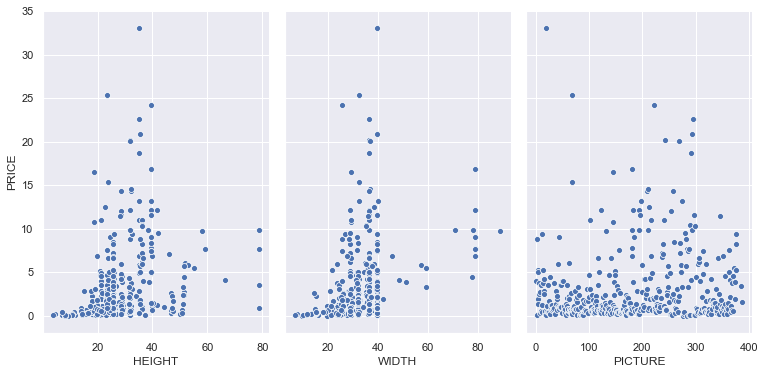

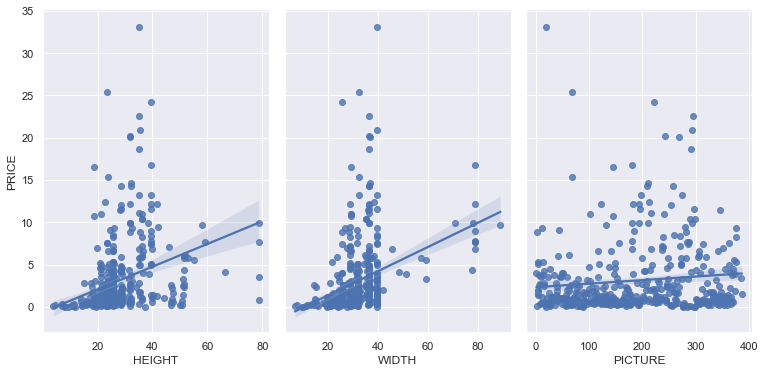

In [2]:
#import csv file#
data=pd.read_csv('monet.csv')
target=data['PRICE']
features=data.drop('PRICE',axis=1)

sns.pairplot(data, x_vars=['HEIGHT','WIDTH','PICTURE'],y_vars='PRICE',size=5,aspect=0.7)
sns.pairplot(data, x_vars=['HEIGHT','WIDTH','PICTURE'],y_vars='PRICE',size=5,aspect=0.7,kind='reg')

In [3]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=10)

#percent of train dataset
len(X_train)/len(features)
#percent of train dataset
X_test.shape[0]/features.shape[0]

0.2

In [4]:
lreg=LinearRegression()
lreg.fit(X_train,y_train)

#find the coefficients
print('Size(X) Coefficient: ',lreg.coef_)
print('Intercept: ',lreg.intercept_)
pd.DataFrame(data=lreg.coef_,index=X_train.columns,columns=['Co-efficient'])

#R square
print('Train Dataset R-square:', lreg.score(X_train,y_train))
print('Test Dataset R-square:', lreg.score(X_test,y_test))

print(lreg.predict([[21.3,25.6,1,1,1]]))
print('Test data Price Predictions:',lreg.predict(X_test))
print('Train data Price Predictions:',lreg.predict(X_train))

Size(X) Coefficient:  [0.08609321 0.10102496 2.484815   0.00342413 0.26624809]
Intercept:  -5.468791476523214
Train Dataset R-square: 0.18670444104921857
Test Dataset R-square: 0.19648778338750894
[1.70572011]
Test data Price Predictions: [ 3.60579308  2.1619295   5.05460398  4.22112856  3.97840088  3.25598088
  2.70831568  4.05070667  2.83336401  2.68254184  3.90835419  3.08661172
  3.68353997  2.23461776  2.67026997  3.95599342  3.09125774  2.12229018
  4.01647826  4.59215299  2.13702324  4.19123742  4.49763497  3.17751139
  2.34539798  2.35889944  7.02620941  3.9081609   4.61973933  2.88798032
  6.33470186  2.70847303  5.85233928  2.23811441  3.54864999  1.45009809
  4.23598114 -0.40914313  3.29624153  4.04364268  2.89954479  5.22883441
  4.86124779 -0.428035    2.58440406  4.74399319  4.55992425  5.10133042
  2.59433405  2.81225327  2.96073506  3.25255675  4.18968722  3.45035925
  3.50631929  2.5987049   1.31136742  2.71663637  2.98288446  2.9289344
  3.3185798   3.3526907   3.1383

In [5]:
#cross validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
scores=cross_val_score(lreg, X_train, y_train, cv=10)
print(scores.mean())

0.13593576101309796


In [6]:
#loss functions
pred=lreg.predict(X_test)
print('MSE for Linear Regression:', mse(y_test,pred))
print('RMSE for Linear Regression:', np.sqrt(mse(y_test,pred)))
print('MAE for Linear Regression:', mae(y_test,pred))

MSE for Linear Regression: 9.27105952436276
RMSE for Linear Regression: 3.044841461285425
MAE for Linear Regression: 2.237093170347303
